### Tugas 2 - DATA EXPLORATION AND PREPROCESSING
1. Abdul Hamid Umar (17/411323/PA/17843)
2. Akmal Adi Sulistyo (17/412630/PA/17949)
3. Rayhan Rizqi Bebryan (17/414613/PA/18113)
4. Achmad Quraish Haris ()

### A. Data Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("Video-Store.xls")
df.head()

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,M,45000,25,27,2.5,Yes,Action,NaN,NaN,NaN
1,2,F,54000,33,12,3.4,No,Drama,NaN,NaN,NaN
2,3,F,32000,20,42,1.6,No,Comedy,NaN,NaN,NaN
3,4,F,59000,70,16,4.2,Yes,Drama,NaN,NaN,NaN
4,5,M,37000,35,25,3.2,Yes,Action,NaN,NaN,NaN


#### a. Mean, median, mode dari kolom Income dan Age

In [127]:
income_mean = df["Income"].mean()
income_median = df["Income"].median()
income_mode = df["Income"].mode()

age_mean = df["Age"].mean()
age_median = df["Age"].median()
age_mode = df["Age"].mode()


print("Nilai dari kolom Income\n"+ 
      "Mean : " + str(income_mean) + 
      "\nMedian : " + str(income_median) +
      "\nMode : " + str(income_mode[0]))

print("\nNilai dari kolom Age\n"+ 
      "Mean : " + str(age_mean) + 
      "\nMedian : " + str(age_median) +
      "\nMode : " + str(age_mode[0]))

Nilai dari kolom Income
Mean : 42300.0
Median : 41000.0
Mode : 29000

Nilai dari kolom Age
Mean : 31.56
Median : 30.0
Mode : 25


Dapat dilihat bahwa atribut `Income` dan `Age` miring ke kanan (positively skewed)

#### b. Histogram dari Income dan Age

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E718D27780>,
      dtype=object)

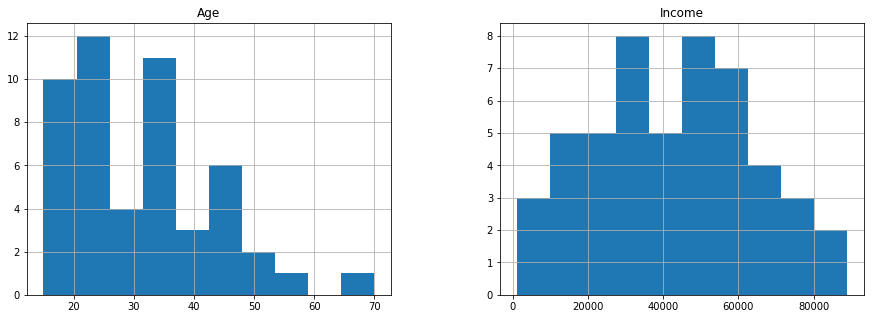

In [128]:
age_income = df[["Age", "Income"]]
age_income.hist(figsize=(15,5))

#### c.  Nilai min, max, Q1, Q2, Q3 dari Income dan Age

In [129]:
percentile = np.percentile(df["Income"], [25,50,75])
min_val = np.min(df["Income"])
max_val = np.max(df["Income"])

print("Nilai dari kolom Income\n"+ 
      "Min : " + str(min_val) + 
      "\nMax : " + str(max_val) +
      "\nQ1 : " + str(percentile[0]) +
      "\nQ2 : " + str(percentile[1]) +
      "\nQ3 : " + str(percentile[2]))

percentile = np.percentile(df["Age"], [25,50,75])
min_val = np.min(df["Age"])
max_val = np.max(df["Age"])

print("\nNilai dari kolom Age\n"+ 
      "Min : " + str(min_val) + 
      "\nMax : " + str(max_val) +
      "\nQ1 : " + str(percentile[0]) +
      "\nQ2 : " + str(percentile[1]) +
      "\nQ3 : " + str(percentile[2]))

Nilai dari kolom Income
Min : 1000
Max : 89000
Q1 : 26750.0
Q2 : 41000.0
Q3 : 56750.0

Nilai dari kolom Age
Min : 15
Max : 70
Q1 : 22.0
Q2 : 30.0
Q3 : 37.5


#### d. Boxplot dari Income dan Age

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


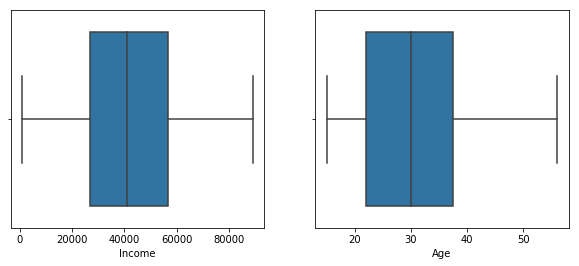

In [130]:
fig, ax =plt.subplots(1,2, figsize=(10,4))
sns.boxplot(x="Income", data= df, showfliers=False, ax=ax[0])
sns.boxplot(x="Age", data= df, showfliers=False, ax=ax[1])
fig.show()

#### e. Rata - rata Income pelanggan pria dan wanita

In [131]:
male = df[df["Gender"] == "M"]
female = df[df["Gender"] == "F"]

print("Male customer average income :", male["Income"].mean())
print("Female customer average income :", female["Income"].mean())

Male customer average income : 41000.0
Female customer average income : 43708.333333333336


Dapat disimpulkan bahwa pelanggan wanita memiliki rerata penghasilan yang lebih tinggi jika dibandingkan dengan pelanggan pria.

#### f. Genre film yang paling banyak ditonton pelanggan pria dan wanita

In [132]:
mgenre = male["Genre"].mode()
fgenre = female["Genre"].mode()
print("Male customer most watched genre :", mgenre[0])
print("Female customer most watched genre :", fgenre[0])

Male customer most watched genre : Action
Female customer most watched genre : Drama


#### g. Rata - rata Income pelanggan pria dan wanita yang menyukai genre komedi

In [133]:
comedy_male = male[male["Genre"] == "Comedy"]
comedy_female = female[female["Genre"] == "Comedy"]

print("Comedy-loving male customer average income :", comedy_male["Income"].mean())
print("Comedy-loving female customer average income :", comedy_female["Income"].mean())

Comedy-loving male customer average income : 56000.0
Comedy-loving female customer average income : 34000.0


Diantara penyuka film bergenre komedi, pelanggan pria memiliki rerata penghasilan yang lebih tinggi jika dibandingkan dengan pelanggan wanita.

#### h. Koefisien korelasi antara atribut numerik

In [134]:
df_clean = df.loc[:, "Income":"Avg Per Visit"]
plt.figure(figsize=(10, 5))
df_clean.corr(method='pearson')

,Income,Age,Rentals,Avg Per Visit
Income,1.000000,0.627013,-0.274873,0.305221
Age,0.627013,1.000000,-0.549611,0.397372
Rentals,-0.274873,-0.549611,1.000000,0.070302
Avg Per Visit,0.305221,0.397372,0.070302,1.000000


<Figure size 720x360 with 0 Axes>

Berdasarkan tabel diatas, atribut `Income` dan `Age` memiliki korelasi terbesar, sedangkan atribut `Age` dan `Rental` memiliki korelasi terkecil. 

#### i. Scatter plot atribut numerik

In [135]:
# fig, ax =plt.subplots(1,6, figsize=(20,5))
# sns.scatterplot(data=df_clean, x="Income", y="Age", ax=ax[0])
# sns.scatterplot(data=df_clean, x="Income", y="Rentals",ax=ax[1])
# sns.scatterplot(data=df_clean, x="Income", y="Avg Per Visit",ax=ax[2])
# sns.scatterplot(data=df_clean, x="Age", y="Rentals",ax=ax[3])
# sns.scatterplot(data=df_clean, x="Age", y="Avg Per Visit",ax=ax[4])
# sns.scatterplot(data=df_clean, x="Rentals", y="Avg Per Visit",ax=ax[5])
# fig.show

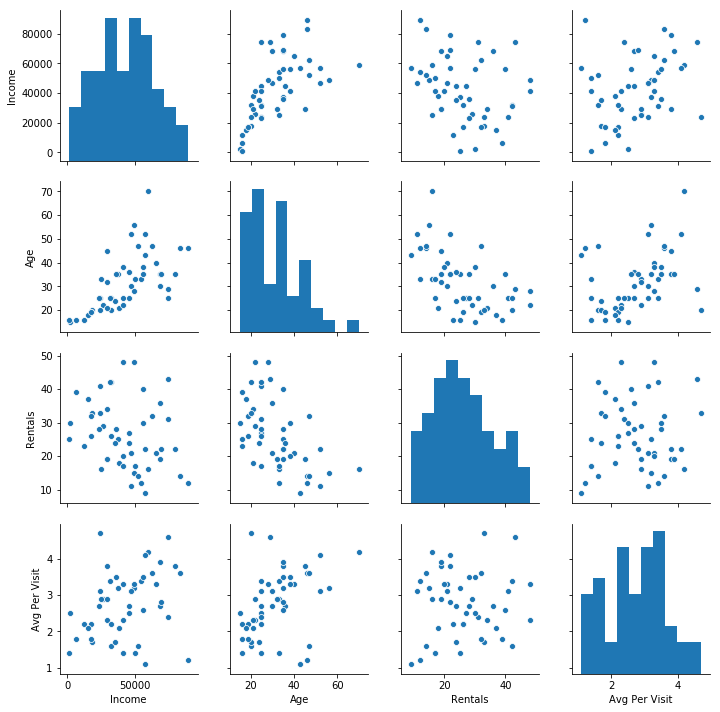

In [136]:
sns.pairplot(data = df_clean)

#### j. Karakteristik Valued Customer

In [137]:
valued = df[df["Rentals"] >= 30]
reg = df[df["Rentals"] < 30]

In [138]:
valued.head()

valued_income = valued["Income"].mean()
valued_age = valued["Age"].mean()

reg_income = reg["Income"].mean()
reg_age = reg["Age"].mean()

print("Karakteristik customer berharga\n"+ 
      "Income : " + str(valued_income) + 
      "\nAge : " + str(valued_age))

print("\nKarakteristik customer biasa\n"+ 
      "Income : " + str(reg_income) + 
      "\nAge : " + str(reg_age))


Karakteristik customer berharga
Income : 37666.666666666664
Age : 25.166666666666668

Karakteristik customer biasa
Income : 44906.25
Age : 35.15625


Customer berharga memiliki rerata penghasilan yang lebih kecil dari customer biasa, tetapi memiliki rerata umur yang lebih muda daripada customer biasa.

### B. Data Preprocessing

#### a. Melakukan binning data

In [ ]:
df['bin'] = pd.qcut